<a href="https://colab.research.google.com/github/KV-23/FINANCE_PROJECTS/blob/main/Stock_Price_Prediction_Using_Python_%26_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yf

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import datetime
import yfinance as yf

In [3]:
#This method does not work
#df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2024-08-08')
#print(df.head())

In [4]:
ends = datetime.date.today()
df=yf.download('AAPL',start='2012-01-01',end=ends)
print(df)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.416984   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.483715   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.622310   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.754262   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.734028   
...                ...         ...         ...         ...         ...   
2024-08-02  219.149994  225.600006  217.710007  219.860001  219.860001   
2024-08-05  199.089996  213.500000  196.000000  209.270004  209.270004   
2024-08-06  205.300003  209.990005  201.070007  207.229996  207.229996   
2024-08-07  206.899994  213.639999  206.389999  209.820007  209.820007   
2024-08-08  213.110001  214.199997  208.830002  213.309998  213.309998   

               Volume  
Date         

In [5]:
df.shape

(3170, 6)

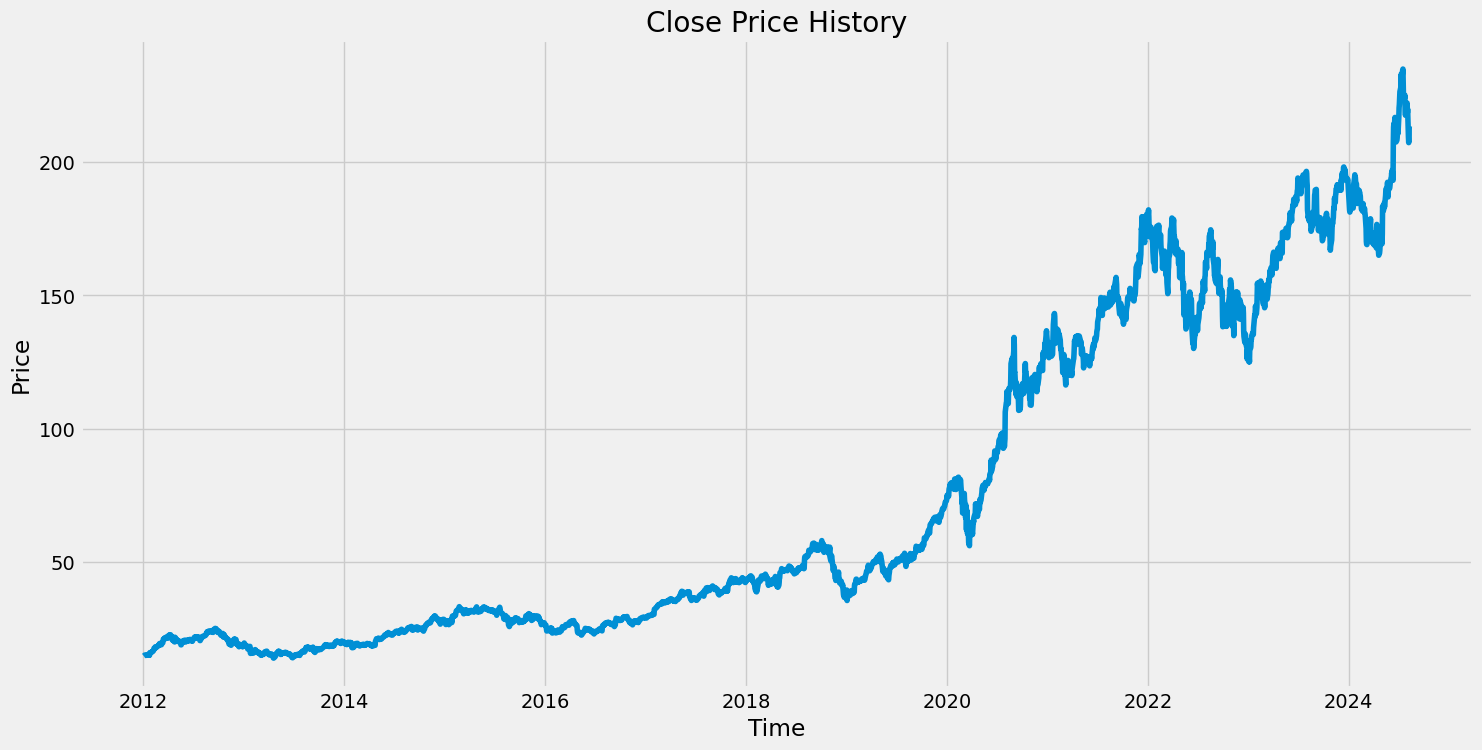

In [6]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [7]:
close_data=df.filter(['Close'])
#Converting into numpy array
dataset=close_data.values
#getting the number of rows to train the model on
training_data_length=math.ceil(len(dataset)*0.8)

In [8]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.87508626],
       [0.88681253],
       [0.90261346]])

In [9]:
#create training dataset

train_data=scaled_data[0:training_data_length,:]
#split into x_train and y_train
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]



In [10]:
#convert to np array
x_train,y_train=np.array(x_train),np.array(y_train)

In [11]:
#Reshape the data
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
#we are converting

In [14]:
#BUILD LSTM MODEL
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [16]:
model.fit(x_train,y_train,batch_size=1, epochs=1)

2476/2476 ━━━━━━━━━━━━━━━━━━━━ 76s 29ms/step - loss: 9.9034e-04


In [17]:
#creates a testing dataset
#Creates a new array of scaled values from index 2476
test_data=scaled_data[training_data_length-60:,:]
x_test=[]
y_test=dataset[training_data_length:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [18]:
#convert to np array
x_test=np.array(x_test)

In [19]:
#reshaping the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [22]:
#get the predicted price values
predictions=model.predict(x_test)
predictions= scaler.inverse_transform(predictions)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [23]:
#Get the root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

2.5226359201906607

<ipython-input-25-c91ac5b571e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


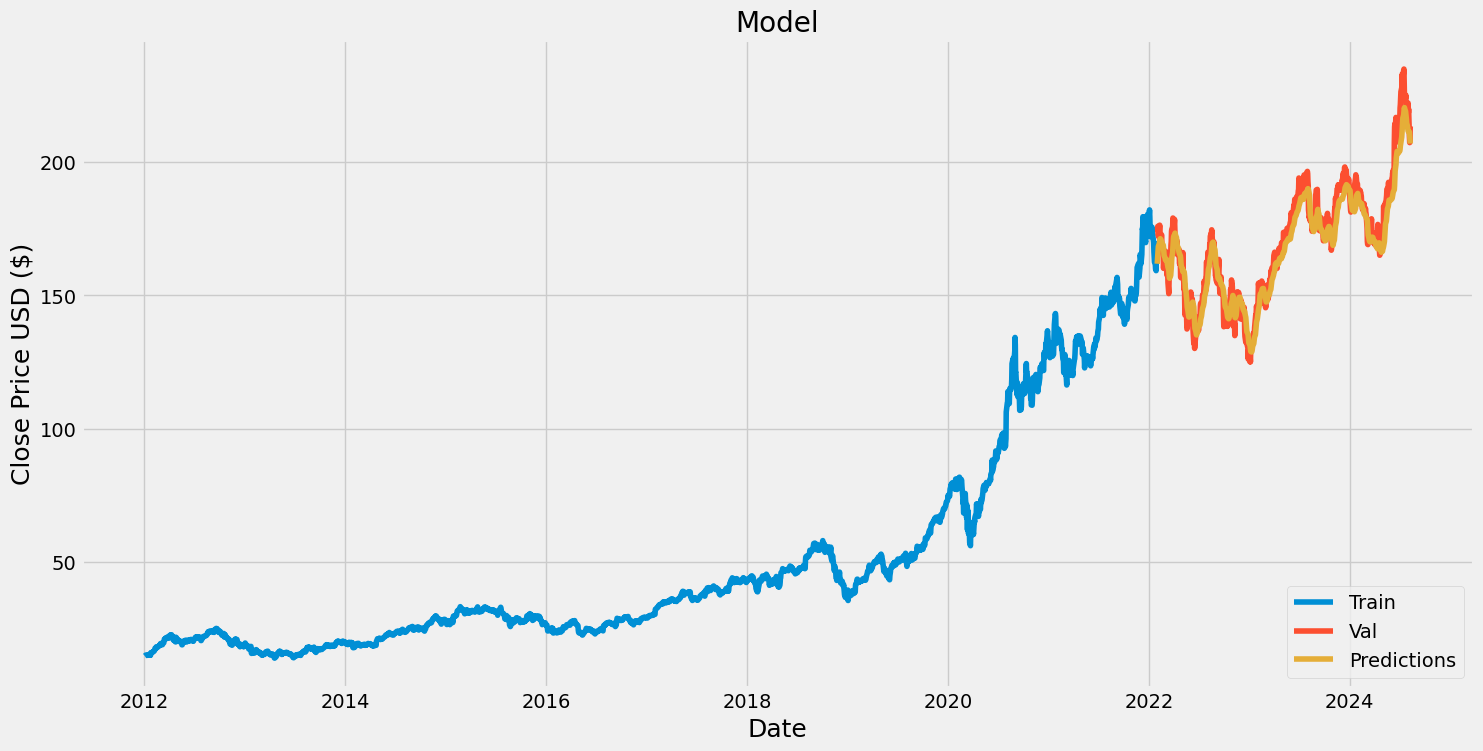

In [25]:
#Plot the data
train= df[:training_data_length]
valid= df[training_data_length:]
valid['Predictions']=predictions
#Visualise
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [27]:
valid

,Open,High,Low,Close,Adj Close,Volume,Predictions
Date,,,,,,,
2022-01-31,170.160004,175.000000,169.509995,174.779999,172.351562,115541600,161.809341
2022-02-01,174.009995,174.839996,172.309998,174.610001,172.183929,86213900,163.282150
2022-02-02,174.750000,175.880005,173.330002,175.839996,173.396851,84914300,165.066940
2022-02-03,174.479996,176.240005,172.119995,172.899994,170.497696,89418100,166.946930
2022-02-04,171.679993,174.100006,170.679993,172.389999,170.211395,82465400,168.293961
...,...,...,...,...,...,...,...
2024-08-02,219.149994,225.600006,217.710007,219.860001,219.860001,105568600,211.270126
2024-08-05,199.089996,213.500000,196.000000,209.270004,209.270004,119548600,211.199127
2024-08-06,205.300003,209.990005,201.070007,207.229996,207.229996,69660500,209.977081
